In [1]:
import glob
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
folder_path = 'my_test'

In [3]:
file_paths = glob.glob(os.path.join(folder_path, '*.npy'))

In [4]:
file_paths.sort()

In [5]:
for path in file_paths:
    data = np.load(path)
    #print(f"Loaded {os.path.basename(path)}: shape {data.shape}")

In [6]:
arrays = [np.load(path) for path in file_paths]

In [7]:
combined_array = np.vstack(arrays)

In [8]:
combined_array.shape

(1160, 8192)

In [9]:
waterfall = np.fft.fftshift(combined_array[100:].T)
waterfall = waterfall[::-1,:]

In [10]:
central_freq = 1120 #MHz
bandwidth = 375 # MHz
num_channels = waterfall.shape[0]

freq_start = central_freq - bandwidth / 2
freq_end = central_freq + bandwidth / 2
frequencies = np.linspace(freq_start, freq_end, num_channels)

time_steps = np.arange(waterfall.shape[1])

Text(0, 0.5, 'Frequency (MHz)')

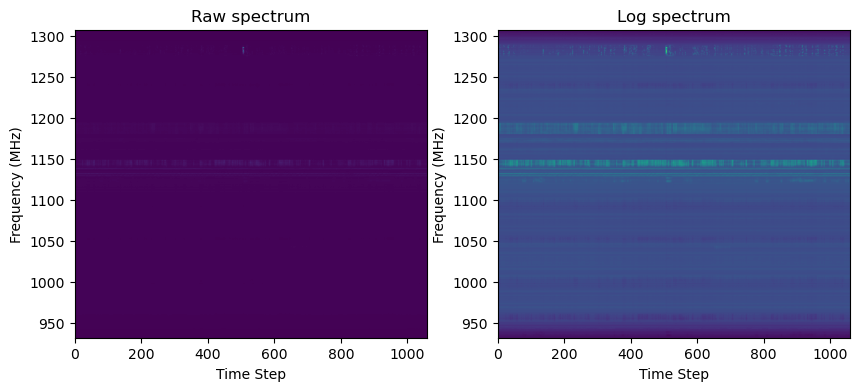

In [11]:
fig, ax = plt.subplots(1, 2, figsize = (10,4))

ax[0].set_title('Raw spectrum')
ax[0].imshow(waterfall, aspect = 'auto', cmap = 'viridis', origin = 'lower', extent=[time_steps[0], time_steps[-1], frequencies[0], frequencies[-1]])
ax[0].set_xlabel('Time Step')
ax[0].set_ylabel('Frequency (MHz)')

ax[1].set_title('Log spectrum')
ax[1].imshow(10*np.log10(waterfall), aspect = 'auto', cmap = 'viridis', origin = 'lower', extent=[time_steps[0], time_steps[-1], frequencies[0], frequencies[-1]])
ax[1].set_xlabel('Time Step')
ax[1].set_ylabel('Frequency (MHz)')

#fig.colorbar(label='Amplitude')


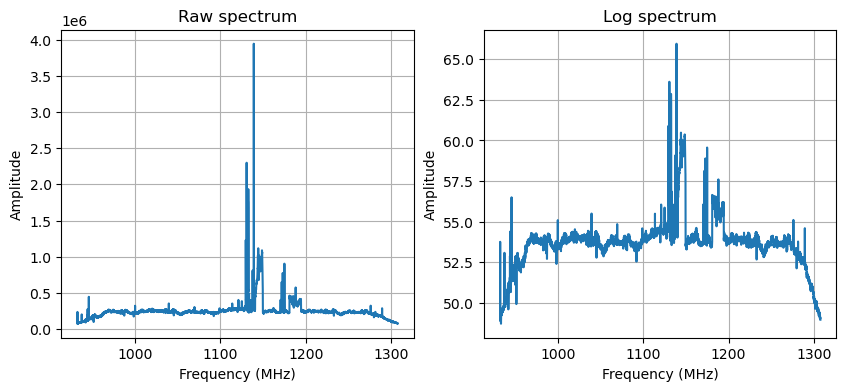

In [12]:
fig, ax = plt.subplots(1, 2, figsize = (10,4))

ax[0].set_title('Raw spectrum')
ax[0].plot(frequencies, waterfall[:,100])
ax[0].set_xlabel('Frequency (MHz)')
ax[0].set_ylabel('Amplitude')
ax[0].grid()

ax[1].set_title('Log spectrum')
ax[1].plot(frequencies, 10*np.log10(waterfall[:,100]))
ax[1].set_xlabel('Frequency (MHz)')
ax[1].set_ylabel('Amplitude')
ax[1].grid()